In [103]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

In [104]:
df = pd.read_csv('building-permits.csv')

C:\Users\Mike\anaconda3\envs\build\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,49,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
df = df.drop(columns=['ID', 'PERMIT#', 'ISSUE_DATE','STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME', 'SUFFIX', 'WORK_DESCRIPTION', 'BUILDING_FEE_PAID', 'ZONING_FEE_PAID', 'OTHER_FEE_PAID', 'SUBTOTAL_PAID', 'BUILDING_FEE_UNPAID', 'ZONING_FEE_UNPAID', 'OTHER_FEE_UNPAID', 'SUBTOTAL_UNPAID', 'BUILDING_FEE_WAIVED', 'ZONING_FEE_WAIVED', 'OTHER_FEE_WAIVED', 'SUBTOTAL_WAIVED', 'TOTAL_FEE', 'CONTACT_1_TYPE', 'CONTACT_1_NAME', 'CONTACT_1_CITY', 'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'CONTACT_2_TYPE', 'CONTACT_2_NAME', 'CONTACT_2_CITY', 'CONTACT_2_STATE', 'CONTACT_2_ZIPCODE', 'CONTACT_3_TYPE', 'CONTACT_3_NAME', 'CONTACT_3_CITY', 'CONTACT_3_STATE', 'CONTACT_3_ZIPCODE', 'CONTACT_4_TYPE', 'CONTACT_4_NAME', 'CONTACT_4_CITY', 'CONTACT_4_STATE', 'CONTACT_4_ZIPCODE', 'CONTACT_5_TYPE', 'CONTACT_5_NAME', 'CONTACT_5_CITY', 'CONTACT_5_STATE', 'CONTACT_5_ZIPCODE', 'CONTACT_6_TYPE', 'CONTACT_6_NAME', 'CONTACT_6_CITY', 'CONTACT_6_STATE', 'CONTACT_6_ZIPCODE', 'CONTACT_7_TYPE', 'CONTACT_7_NAME', 'CONTACT_7_CITY', 'CONTACT_7_STATE', 'CONTACT_7_ZIPCODE', 'CONTACT_8_TYPE', 'CONTACT_8_NAME', 'CONTACT_8_CITY', 'CONTACT_8_STATE', 'CONTACT_8_ZIPCODE', 'CONTACT_9_TYPE', 'CONTACT_9_NAME', 'CONTACT_9_CITY', 'CONTACT_9_STATE', 'CONTACT_9_ZIPCODE', 'CONTACT_10_TYPE', 'CONTACT_10_NAME', 'CONTACT_10_CITY', 'CONTACT_10_STATE', 'CONTACT_10_ZIPCODE', 'CONTACT_11_TYPE', 'CONTACT_11_NAME', 'CONTACT_11_CITY', 'CONTACT_11_STATE', 'CONTACT_11_ZIPCODE', 'CONTACT_12_TYPE', 'CONTACT_12_NAME', 'CONTACT_12_CITY', 'CONTACT_12_STATE', 'CONTACT_12_ZIPCODE', 'CONTACT_13_TYPE', 'CONTACT_13_NAME', 'CONTACT_13_CITY', 'CONTACT_13_STATE', 'CONTACT_13_ZIPCODE', 'CONTACT_14_TYPE', 'CONTACT_14_NAME', 'CONTACT_14_CITY', 'CONTACT_14_STATE', 'CONTACT_14_ZIPCODE', 'CONTACT_15_TYPE', 'CONTACT_15_NAME', 'CONTACT_15_CITY', 'CONTACT_15_STATE', 'CONTACT_15_ZIPCODE', 'REPORTED_COST', 'PIN1', 'PIN2', 'PIN3', 'PIN4', 'PIN5', 'PIN6', 'PIN7', 'PIN8', 'PIN9', 'PIN10', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD', 'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes', 'Census Tracts', 'Wards', ':@computed_region_awaf_s7ux'])
df.head()

,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,PROCESSING_TIME
0,PERMIT - SIGNS,SIGN PERMIT,2014-02-24T00:00:00.000,8.0
1,PERMIT - SIGNS,SIGN PERMIT,2013-11-18T00:00:00.000,31.0
2,PERMIT - SIGNS,SIGN PERMIT,2013-11-18T00:00:00.000,31.0
3,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2017-01-25T00:00:00.000,0.0
4,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2007-02-15T00:00:00.000,0.0


I know I must get rid of null values in the processing time column, seems as if I do not have any.

In [106]:
#============================================================================== Data Cleaning
print(df.shape)
def find_null(col):
    print('Do I have any null values in my dataframe, if so, how many')
    print(df.isnull().values.any())
    print(df.isnull().sum().sum())
    print('Do I have any null values in my Column of interest, if so, how many')
    print(df[col].isnull().values.any())
    print(df[col].isnull().sum())

find_null('PROCESSING_TIME')
df = df[df['PROCESSING_TIME'].notna()]
print('Lets hope this is false')
print(df['PROCESSING_TIME'].isnull().values.any())
print(df.shape)
print('Now we will remove negative values.')
# This one is negative --->  df['PROCESSING_TIME'][16457]   #.min()

df = df[df['PROCESSING_TIME'] >= 0]
print(df.shape)
print(df['PROCESSING_TIME'].min())
print('This should be zero')

#====================  Format for dates
df['APPLICATION_START_DATE'] = pd.to_datetime(df['APPLICATION_START_DATE'], format="%Y-%m-%dT%H:%M:%S")
print(df['APPLICATION_START_DATE'].dtype)

(606390, 4)
Do I have any null values in my dataframe, if so, how many
True
1006
Do I have any null values in my Column of interest, if so, how many
True
500
Lets hope this is false
False
(605890, 4)
Now we will remove negative values.
(605814, 4)
0.0
This should be zero
datetime64[ns]


I will try to create a histogram of this data,  I will restrict it to positive numbers and cut it off at 500, there are not many data points out here.

Our outliers are below -12.0, and above 20.0
Percentage of outliers in data: 17%
The number of outliers is: 105646


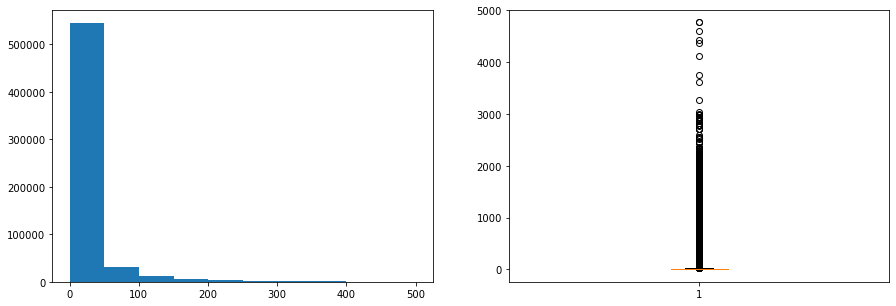

In [107]:
plt.rcParams["figure.figsize"] = (15,5)
# ======================================================= All Permit Types
plt.subplot(1,2,1)
plt.hist(df['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df['PROCESSING_TIME'])
# df.describe()

# ===================== Outlier Analysis
q1 = np.percentile(df['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_nml = df[df['PROCESSING_TIME'] <= high_lim]
df_out = df[df['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_out)/len(df)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_out)))



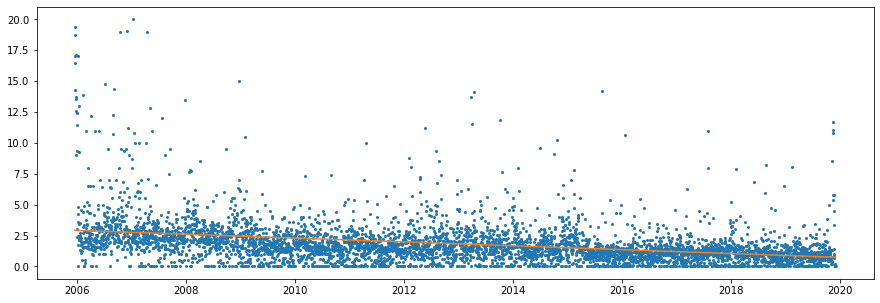

In [108]:
S = df_nml.groupby('APPLICATION_START_DATE')['PROCESSING_TIME'].mean(numeric_only=False)

#============================================================================== Simple Regression Analysis

x = dates.date2num(S.index)
y = S.values
fit = np.polyfit(x,y, 1)
plt.plot_date(S.index, S.values,markersize=2)
plt.plot(S.index, fit[1] + fit[0]*x )
plt.show()

Lets investigate how many total permits are applied for, annually and monthly

<AxesSubplot:xlabel='APPLICATION_START_DATE'>

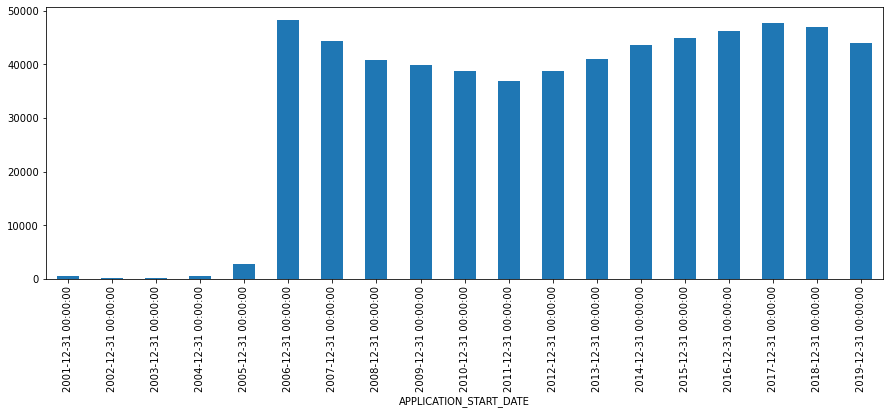

In [109]:
df_edit = df.drop(columns=['REVIEW_TYPE', 'PERMIT_TYPE'])
df_edit.head()
df_annual = df_edit.groupby(pd.Grouper(key='APPLICATION_START_DATE', freq='Y')).count()
df_monthly = df_edit.groupby(pd.Grouper(key='APPLICATION_START_DATE', freq='M')).count()

df_annual.plot(kind='bar',legend=None)

<AxesSubplot:xlabel='APPLICATION_START_DATE'>

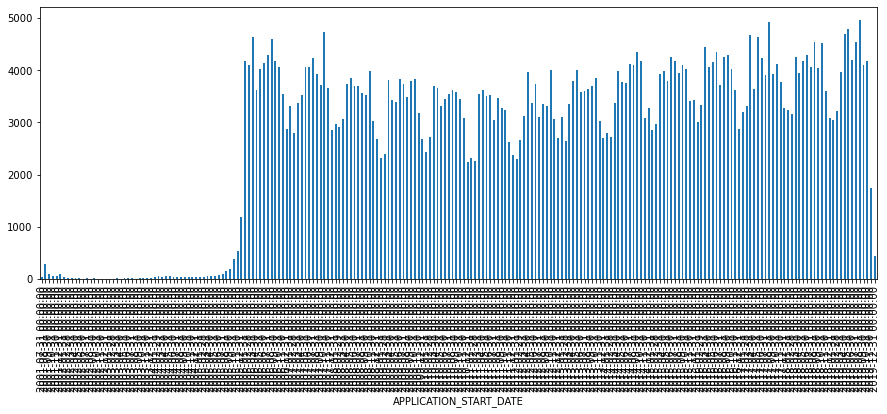

In [110]:
df_monthly.plot(kind='bar',legend=None)

Looks like there is less data before 2006, Looks to be a data problem, it is unrealistic that the number of permits was that different.  I will split into each type of permit

In [111]:
x = df['PERMIT_TYPE'].to_list()
xs = set(x)
print(xs)
xsl = list(xs)

{'PERMIT - WRECKING/DEMOLITION', 'PERMIT - NEW CONSTRUCTION', 'PERMIT - RENOVATION/ALTERATION', 'PERMIT - ELECTRIC WIRING', 'PERMIT - ELEVATOR EQUIPMENT', 'PERMIT - PORCH CONSTRUCTION', 'PERMIT - SCAFFOLDING', 'PERMIT - EASY PERMIT PROCESS', 'PERMIT - SIGNS', 'PERMIT - FOR EXTENSION OF PMT', 'PERMIT - REINSTATE REVOKED PMT'}


In [112]:
def subframe(permit_type):
    print(permit_type)
    # ======================================================= General Plots
    df_sub = df.loc[df['PERMIT_TYPE'] == permit_type]
    plt.rcParams["figure.figsize"] = (15,10)
    plt.subplot(2,2,1)
    plt.title('Histogram')
    plt.hist(df_sub['PROCESSING_TIME'],range=(0,500))
    plt.subplot(2,2,2)
    plt.title('Boxplot')
    trash = plt.boxplot(df_sub['PROCESSING_TIME'])
    
    # ===================== Outlier Analysis
    q1 = np.percentile(df_sub['PROCESSING_TIME'], 25, interpolation='midpoint')
    q3 = np.percentile(df_sub['PROCESSING_TIME'], 75, interpolation='midpoint')
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    high_lim = q3 + 1.5*iqr
    print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

    df_sub_nml = df_sub[df_sub['PROCESSING_TIME'] <= high_lim]
    df_sub_out = df_sub[df_sub['PROCESSING_TIME'] > high_lim]
    pct_outlier = 100*len(df_sub_out)/len(df_sub)
    print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
    print('The number of outliers is: '+ str(len(df_sub_out)))
    
    # ===================== Model of non-outlier points
    S = df_sub_nml.groupby('APPLICATION_START_DATE')['PROCESSING_TIME'].mean(numeric_only=False)
    plt.subplot(2,2,3)
    x = dates.date2num(S.index)
    y = S.values
    fit = np.polyfit(x,y, 1)
    plt.title('Normal Points')
    plt.xlabel('Date')
    plt.ylabel('Processing time (days)')
    plt.plot_date(S.index, S.values,markersize=2)
    plt.plot(S.index, fit[1] + fit[0]*x )
    
    # ===================== Model of outlier points
    S = df_sub_out.groupby('APPLICATION_START_DATE')['PROCESSING_TIME'].mean(numeric_only=False)
    plt.subplot(2,2,4)
    x = dates.date2num(S.index)
    y = S.values
    fit = np.polyfit(x,y, 1)
    plt.title('Outlier Points')
    plt.xlabel('Date')
    plt.ylabel('Processing time (days)')
    plt.plot_date(S.index, S.values,markersize=2)
    plt.plot(S.index, fit[1] + fit[0]*x )


PERMIT - WRECKING/DEMOLITION
Our outliers are below -63.0, and above 105.0
Percentage of outliers in data: 06%
The number of outliers is: 1064


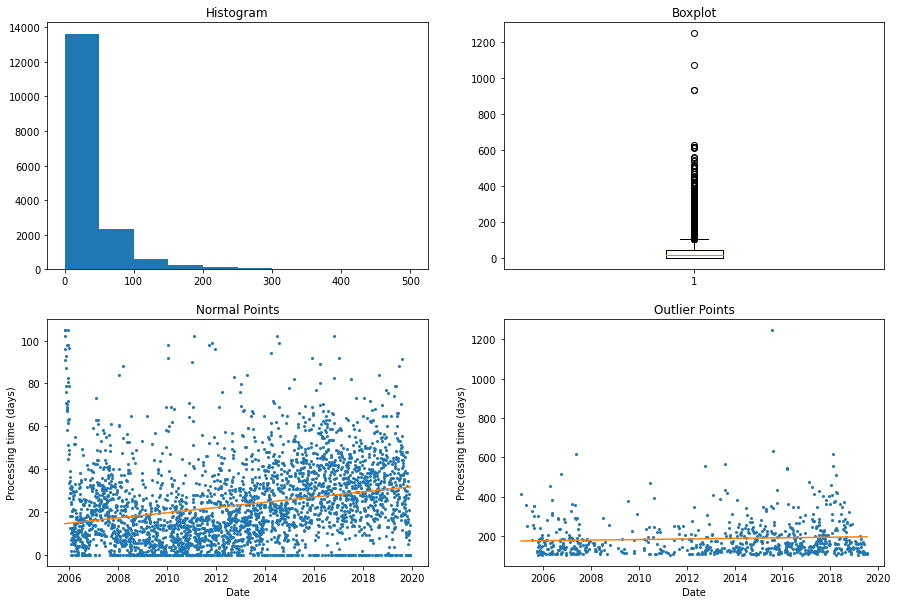

In [113]:
subframe(xsl[0])

PERMIT - NEW CONSTRUCTION
Our outliers are below -67.5, and above 112.5
Percentage of outliers in data: 10%
The number of outliers is: 2181


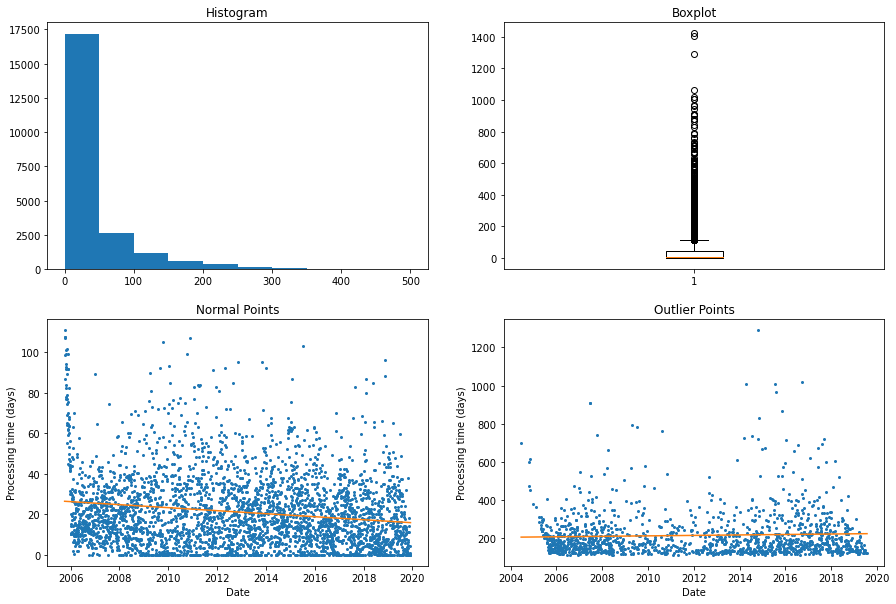

In [114]:
subframe(xsl[1])

PERMIT - RENOVATION/ALTERATION
Our outliers are below -61.5, and above 102.5
Percentage of outliers in data: 08%
The number of outliers is: 10150


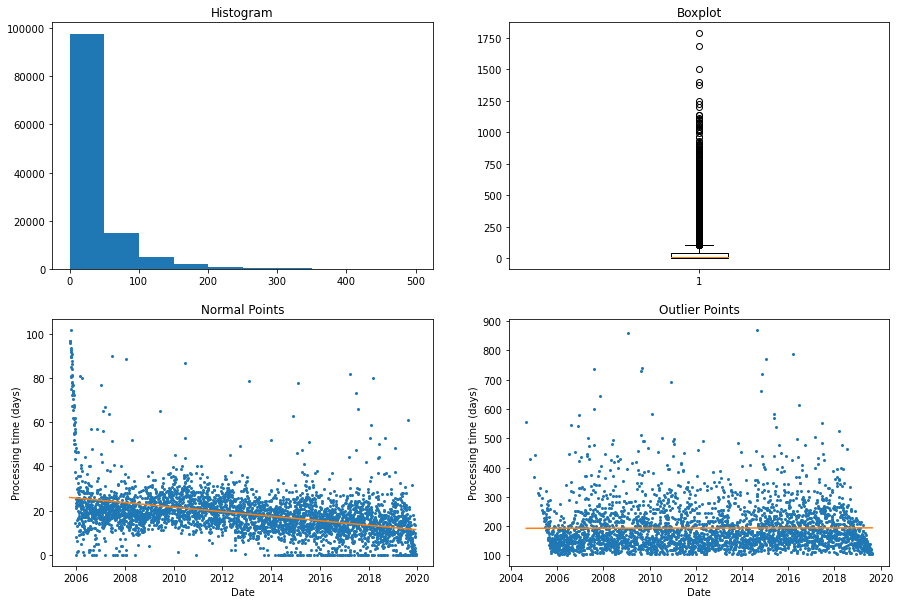

In [115]:
subframe(xsl[2])

PERMIT - ELECTRIC WIRING
Our outliers are below -6.0, and above 10.0
Percentage of outliers in data: 16%
The number of outliers is: 33813


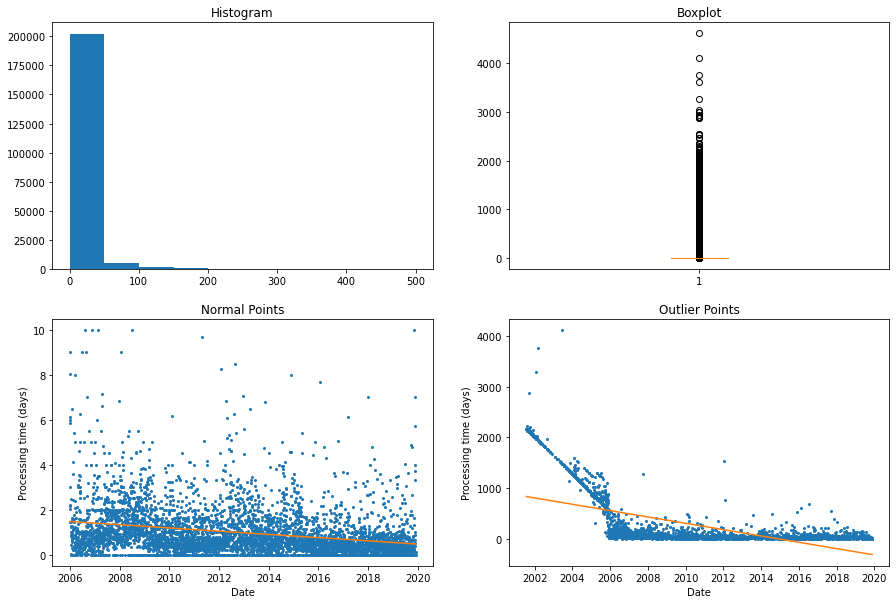

In [116]:
subframe(xsl[3])

PERMIT - ELEVATOR EQUIPMENT
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 18%
The number of outliers is: 2605


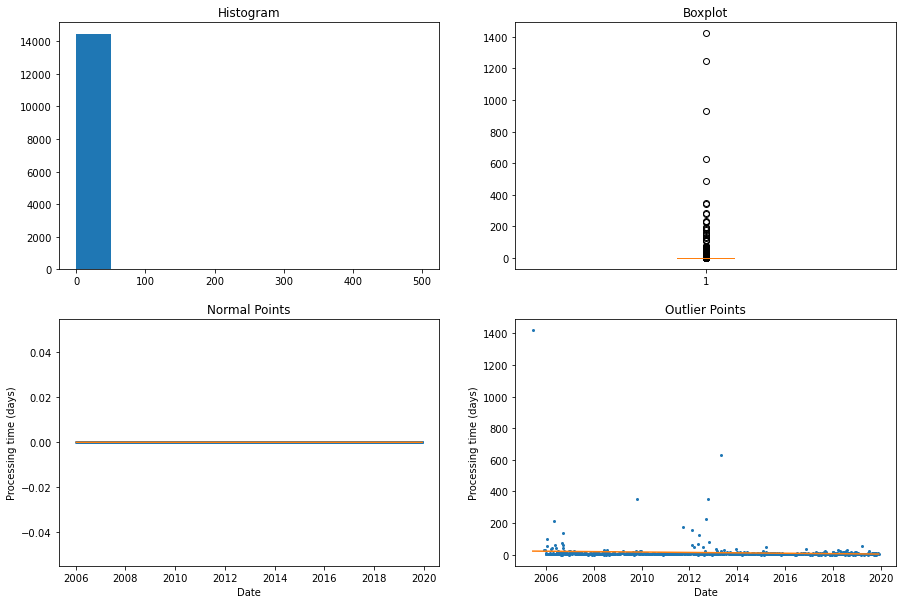

In [117]:
subframe(xsl[4])

PERMIT - PORCH CONSTRUCTION
Our outliers are below -24.0, and above 40.0
Percentage of outliers in data: 13%
The number of outliers is: 412


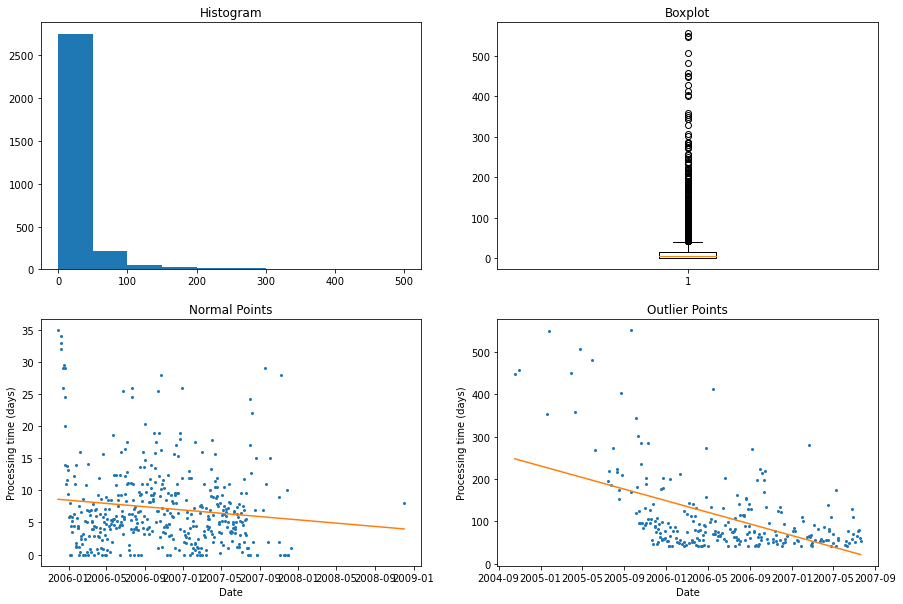

In [118]:
subframe(xsl[5])

PERMIT - SCAFFOLDING
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 04%
The number of outliers is: 331


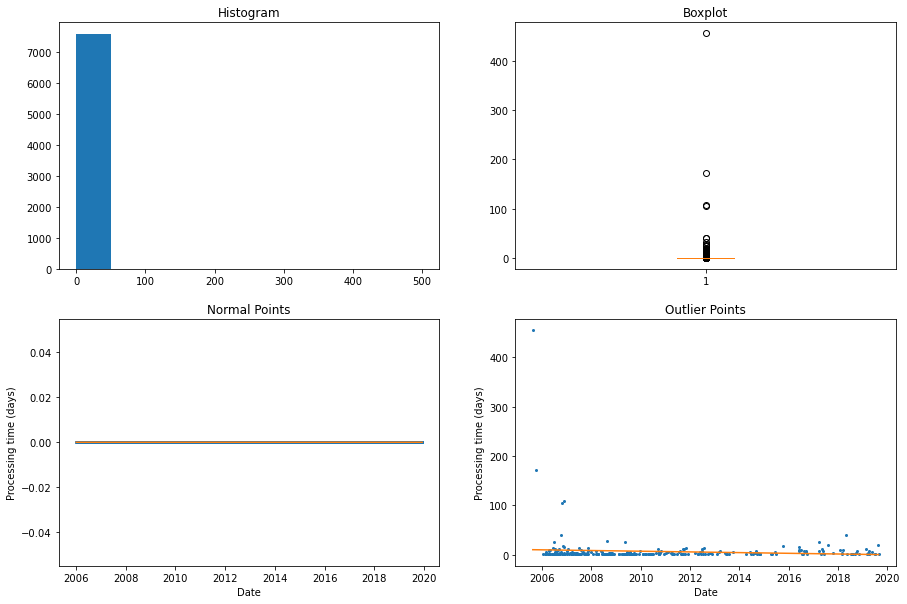

In [119]:
subframe(xsl[6])

PERMIT - EASY PERMIT PROCESS
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 09%
The number of outliers is: 15044


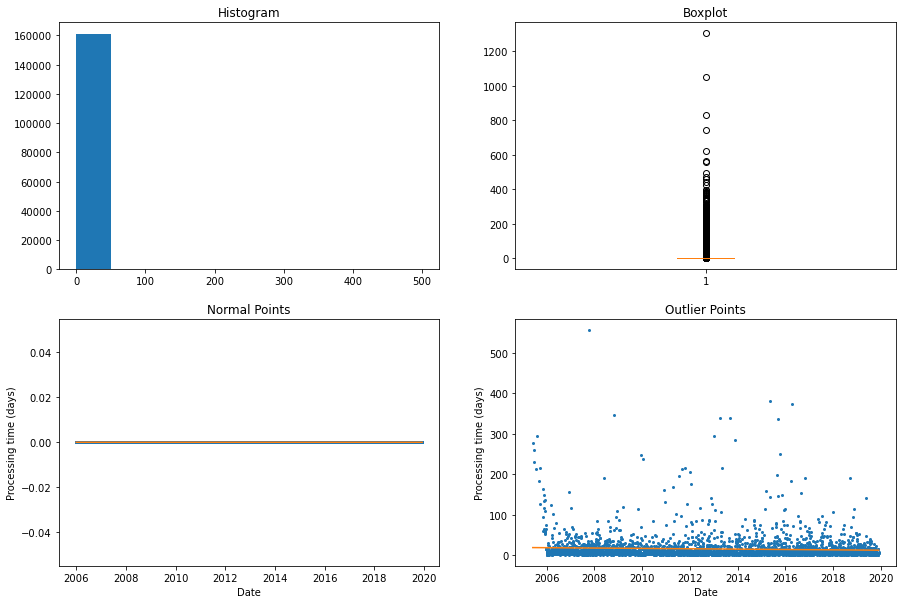

In [120]:
subframe(xsl[7])

PERMIT - SIGNS
Our outliers are below -103.5, and above 188.5
Percentage of outliers in data: 10%
The number of outliers is: 3761


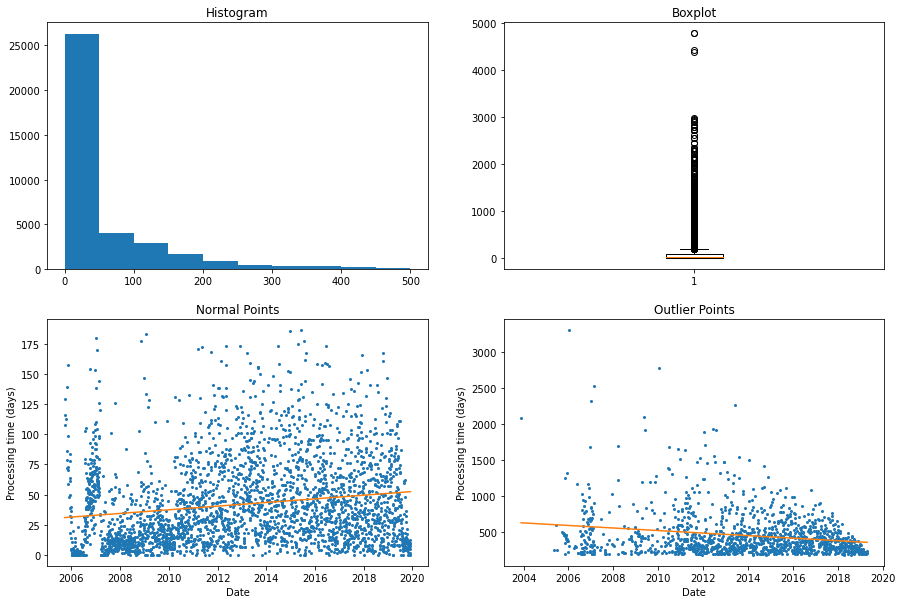

In [121]:
subframe(xsl[8])

PERMIT - FOR EXTENSION OF PMT
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 07%
The number of outliers is: 4


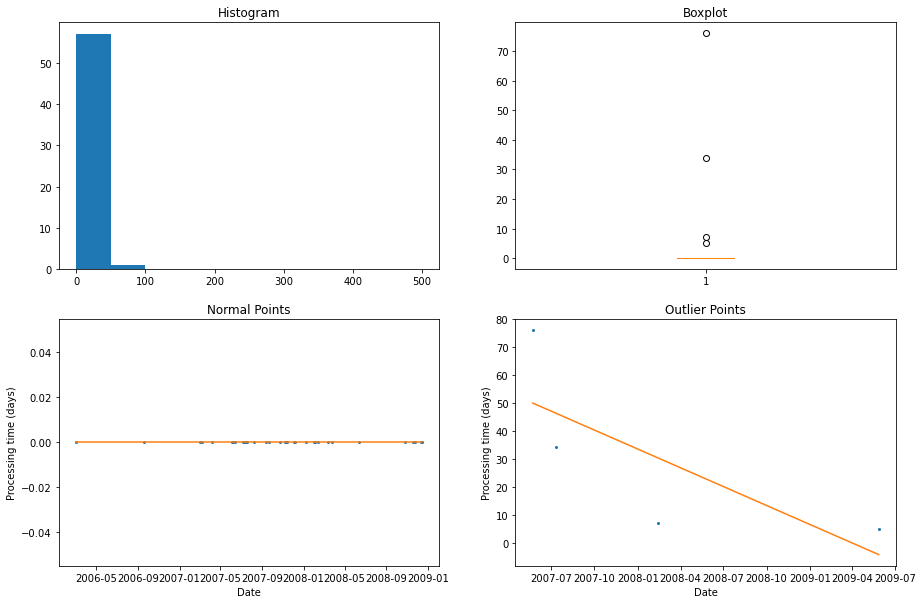

In [122]:
subframe(xsl[9])

PERMIT - REINSTATE REVOKED PMT
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 23%
The number of outliers is: 701


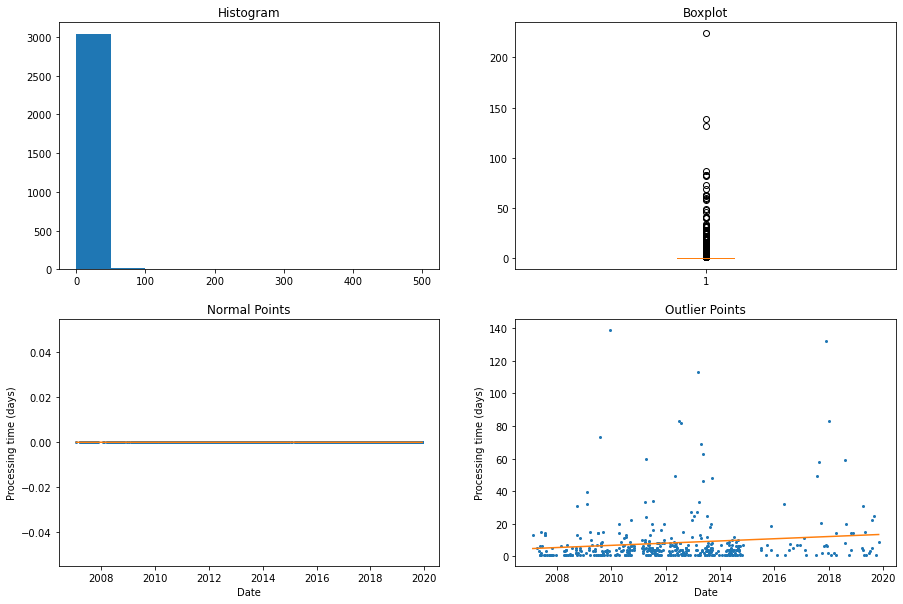

In [123]:
subframe(xsl[10])

What did we learn from all these graphs.  Many of the permits are approved same day, some outliers do exist.  I think for further analysis we have to investigate each, learn what they mean to come up with any conclusion.  I could not find a relationship between this and the other data table downloaded.

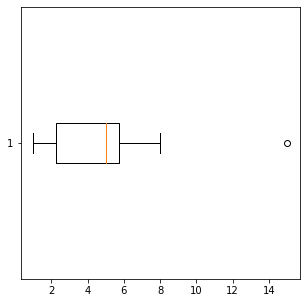

In [124]:
#==============================================================================   Simple Examples to start from.
plt.rcParams["figure.figsize"] = (5,5)
t = plt.boxplot([1,2,2,15,3,4,5,5,5,5,6,8,7,1],vert=False)

In [125]:
T = pd.Series(index=pd.date_range('2015-07-03',periods=14), data=[1,2,2,15,3,4,5,5,5,5,6,8,7,1])
T.head()

2015-07-03     1
2015-07-04     2
2015-07-05     2
2015-07-06    15
2015-07-07     3
Freq: D, dtype: int64

[ 1.29670330e-01 -2.15090549e+03]


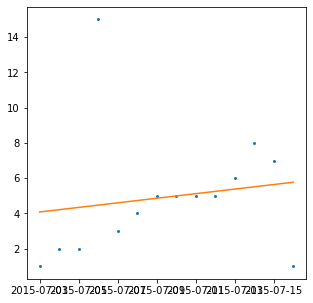

In [126]:
x = dates.date2num(T.index)
y = T.values
fit = np.polyfit(x,y, 1)
print(fit)
plt.plot_date(T.index, T.values,markersize=2)
plt.plot(T.index, fit[1] + fit[0]*x )
plt.show()

In [127]:
data = pd.DataFrame({'date':['6/2/2017','5/23/2017','5/20/2017','6/22/2017','6/21/2017'],'Revenue':[100,200,300,400,500]})
data.date = pd.to_datetime(data.date)
data.date.dtype

dtype('<M8[ns]')

<AxesSubplot:xlabel='APPLICATION_START_DATE'>

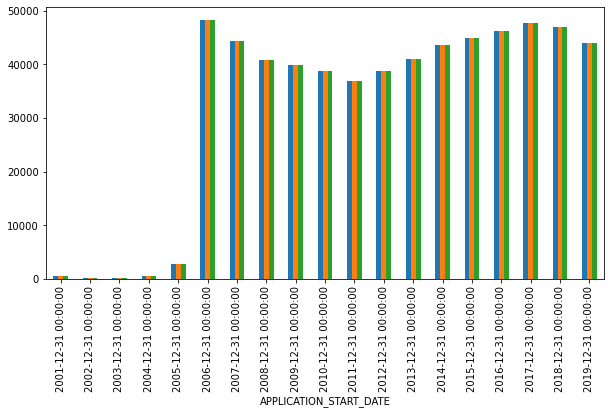

In [128]:
dg = df.groupby(pd.Grouper(key='APPLICATION_START_DATE', freq='Y')).count() # groupby each 1 month
dg.plot(kind='bar',figsize=(10,5),legend=None)


In [129]:
dg.head()

,PERMIT_TYPE,REVIEW_TYPE,PROCESSING_TIME
APPLICATION_START_DATE,,,
2001-12-31,592,592,592
2002-12-31,136,136,136
2003-12-31,77,77,77
2004-12-31,458,458,458
2005-12-31,2836,2836,2836
